<a href="https://colab.research.google.com/github/amazzoli/Quantitative_immunology/blob/main/Noiset_2_learning_the_noise_across_replicates.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

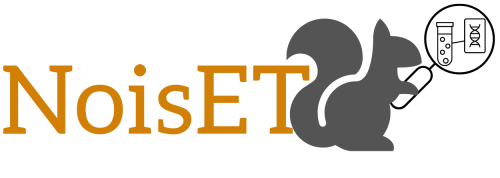

# Inferring responding immune clonotypes

In [ ]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#deciding format of the figures
plt.rc('xtick', labelsize = 25)
plt.rc('ytick', labelsize = 25)

## Part 2 - Learning the noise between replicates

In this notebook, we want to show examples to help the user to learn how NoisET works in practise when using its first function (ie learning experimental noise model from replicate samples). 

We first need to install it on the colab machine, and importing in the notebook.
You can install it on your local machine using `pip install noisets` as well.

In [ ]:
# We are installing noisets to use it !
!pip install noisets

from noisets import noisettes as ns

### 2.1 Loading data

In [ ]:
%%bash
git clone https://github.com/mbensouda/NoisET_tutorial.git

Cloning into 'NoisET_tutorial'...


Below we load the data for two replicates at a given time point (the first).
We will use a noiset utilities called Data_Process.

In [ ]:
path = 'NoisET_tutorial/data/'
filename1 = 'MP_15_F1_short.zip' # first biological replicate
filename2 = 'MP_15_F2_short.zip' # second biological replicate

#colnames that will change if you work with a different data-set
colnames1 = ['Clone fraction','Clone count', 'N. Seq. CDR3', 'AA. Seq. CDR3'] 
colnames2 = ['Clone fraction','Clone count', 'N. Seq. CDR3', 'AA. Seq. CDR3']

# check 
MP_15 = ns.Data_Process(path, filename1, filename2, colnames1,  colnames2)
print("First Filename is : " , MP_15.filename1)
print("Second Filename is : ",  MP_15.filename2)
print("Name of the columns of first file are : ", MP_15.colnames1)
print("Name of the columns of second file are : ", MP_15.colnames2)

# Effectively importing the data
n, df_15 = MP_15.import_data()

First Filename is :  MP_15_F1_short.zip
Second Filename is :  MP_15_F2_short.zip
Name of the columns of first file are :  ['Clone fraction', 'Clone count', 'N. Seq. CDR3', 'AA. Seq. CDR3']
Name of the columns of second file are :  ['Clone fraction', 'Clone count', 'N. Seq. CDR3', 'AA. Seq. CDR3']


/usr/local/lib/python3.7/dist-packages/noisets/noisettes.py:99: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  mergedFrame.drop(newnames[3]+suffixes[1], 1,inplace=True) #removes duplicates


In [ ]:
df_15

,Clone_fraction_1,Clone_fraction_2,Clone_count_1,Clone_count_2,ntCDR3,AACDR3
0,0.031291,0.031687,47133.0,31092.0,TGTGCAGGGGGATACTTTGGAAATGAGAAATTAACCTTT,CAGGYFGNEKLTF
1,0.030580,0.031203,46061.0,30617.0,TGTGCAGCAAGTTACTTTGGAAATGAGAAATTAACCTTT,CAASYFGNEKLTF
2,0.028584,0.026513,43055.0,26015.0,TGTGCTCTGAGGGATTACTATGGGAACAACAGACTCGCTTTT,CALRDYYGNNRLAF
3,0.019119,0.021204,28798.0,20806.0,TGTGTGGTGAGCATCAACACAGGCAAACTAATCTTT,CVVSINTGKLIF
4,0.017015,0.015855,25629.0,15557.0,TGTGCCTTATCCACGGGAGGAGGAAACAAACTCACCTTT,CALSTGGGNKLTF
...,...,...,...,...,...,...
669610,0.000000,0.000001,0.0,1.0,CCTTTCTATTTT,PFYF
669611,0.000000,0.000001,0.0,1.0,CCCATAATCTGG,PIIW
669612,0.000000,0.000001,0.0,1.0,CCCAGTATCTTC,PSIF
669613,0.000000,0.000001,0.0,1.0,CCATCGCTATTC,PSLF


### 2.2 Visualizing the replicate noise

The experimental sampling noise can be visualized in a scatter plot, where each point is a clonotype and the two axis are the frequencies -- normalized abundances -- in the first and second replicate.
In a "perfect" experiment -- meaning sequencing the entire TCR repertoire of one individual, one would expect the counting of the same clonotype to be the same. Therefore, deviations from the diagonal shows this uncertainty.

(2.5e-07, 0.1, 2.5e-07, 0.1)

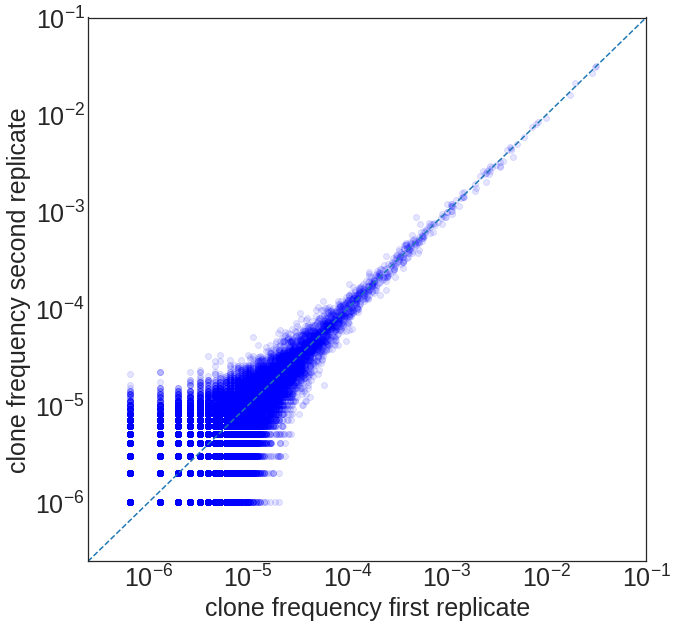

In [ ]:
plt.figure(figsize=(10,10))
plt.rc('xtick', labelsize = 25)
plt.rc('ytick', labelsize = 25)
X = np.linspace(0,1, 1000)

plt.style.use('seaborn-white')
plt.scatter(df_15['Clone_fraction_1'], df_15['Clone_fraction_2'], color = 'blue', alpha = 0.1)
plt.plot(X,X, linestyle ='--')
plt.xlabel(r'clone frequency first replicate', fontsize = 25)
plt.ylabel(r'clone frequency second replicate', fontsize = 25)
plt.xscale('log')
plt.yscale('log')
plt.axis([2.5e-7, 1e-1, 2.5e-7, 1e-1])


### 2.3 - Learning sampling noise

Noiset quantifies sampling noise described previousely by learning a model.

There are 3 possible type of models to choose, which at increasing level of complexity are: the Poisson model (2 parameters), the Negative Binomial model (3 parameters), and the Negative Binomial + Poisson model (5 parameters).

Details about the distributions and the meaning of each parameters are detailed in methods section of READme document of the github repository. 
On this part of the tutorial, we will focus on the negative binomial model, which provides reliable results in a resonable computational time.

The Noiset function starts from a given set of initial parameters, and returns the same number of parameters as a result of the optimizaition process.

In [ ]:
noise_model = 1 # Negative Binomial 

#other models :
# 0 : NB + Poisson
# 1 : NB
# 2 : Poisson

# Suggested initial parameters (they are very close to the optimal one 
# to speed up the computation)
init_paras_arr = [ 
  np.asarray([-2.0, 1.54, 1.23, 6.65, -9.71]),
  np.asarray([-2.0, 1.26, 1.05, -10.1]),
  np.asarray([-2.15, -9.47])
]

init_paras = init_paras_arr[noise_model]

In [ ]:
null_model = ns.Noise_Model() 
result = null_model.learn_null_model(df_15, noise_model, init_paras)

Iter      alph_rho  beta      alpha     fmin      


/usr/local/lib/python3.7/dist-packages/noisets/noisettes.py:169: RuntimeWarning: divide by zero encountered in true_divide
  NBvec=np.log((NBvec+r[:,np.newaxis]-1)*(p[:,np.newaxis]/NBvec))
/usr/local/lib/python3.7/dist-packages/noisets/noisettes.py:169: RuntimeWarning: invalid value encountered in log
  NBvec=np.log((NBvec+r[:,np.newaxis]-1)*(p[:,np.newaxis]/NBvec))
/usr/local/lib/python3.7/dist-packages/noisets/noisettes.py:272: RuntimeWarning: divide by zero encountered in log
  return np.log(Pn_f)
/usr/local/lib/python3.7/dist-packages/noisets/noisettes.py:377: RuntimeWarning: divide by zero encountered in log
  integ = np.exp(np.log(integ) + logfvec[:, np.newaxis])


1 -1.962820 1.253220 1.049594 -10.145589 
2.1481795113159974
2 -1.979179 1.254684 1.044119 -10.146057 
2.1479602706427516
3 -1.978229 1.254564 1.044658 -10.146302 
2.1479593663974783
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 2.1479593663974783
            Iterations: 3
            Function evaluations: 19
            Gradient evaluations: 3


In [ ]:
# Optimal parameters
result[0]['x']

array([ -1.97822857,   1.25456411,   1.04465803, -10.14630235])